# A Primer in Econometric Theory

* [John Stachurski](http://johnstachurski.net/index.html)

## OLS vs IVLS

A simulation comparing IVLS estimation with OLS estimation in the case of endogenous regressors, from chapter 12.  The model is

$$
y = x \beta + u
$$

where $u$ is standard normal.  The instruments $z$ are also scalar valued and standard normal, drawn independently of $u$.  The regressor $x$ is obtained as 

$$
x = \alpha z + (1 - \alpha) u
$$

In the simulation, $\beta=10$ and $\alpha=0.8$.

In [6]:
%matplotlib inline

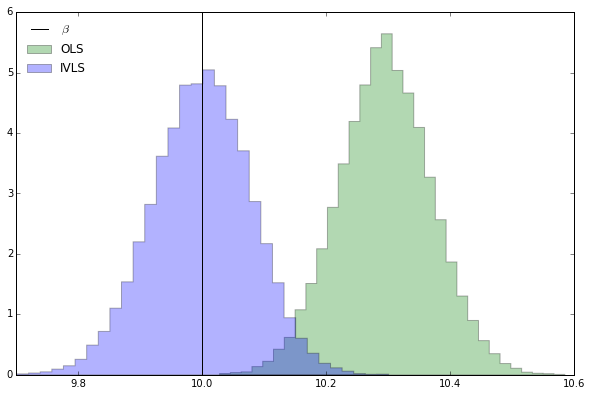

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


N = 250
alpha = 0.8
num_reps = 25000
beta = 10
ols = np.empty(num_reps)
ivls = np.empty(num_reps)

for j in range(num_reps):
    z = np.random.randn(N)
    u = np.random.randn(N)
    x = alpha * z + (1 - alpha) * u
    y = x * beta + u
    ols[j]  = np.sum(x * y) / np.sum(x**2)
    ivls[j]  = np.sum(z * y) / np.sum(z * x)

fig, ax = plt.subplots(figsize=(10, 6.5))
plot_args = dict(bins=32, histtype='stepfilled', alpha=0.3, normed=True)
ax.set_ylim(0, 6)
ax.hist(ols, color='g', label='OLS', **plot_args)
ax.hist(ivls, color='b', label='IVLS', **plot_args)
ax.plot([beta, beta], [0, 6], 'k-', label=r'$\beta$')
ax.legend(loc='upper left', frameon=False)

